In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time,datetime
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_len = len(cities)
cities_df = pd.DataFrame(cities)
cities_df.columns =["City"]
cities_df.head()

,City
0,belushya guba
1,amderma
2,nizhneyansk
3,chuy
4,severo-kurilsk


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q=" + cities[0]

#testing connection
response = requests.get(query_url)

weather_json = response.json()

print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'cod': '404', 'message': 'city not found'}.


In [50]:
#create dataframe to hold all values
weather_df = pd.DataFrame(columns = ["City","Country","Lat","Lng","Date","Temperature","Max_Temperature",
                                     "Min_Temperature","Humidity","Cloudiness","Wind Speed"])

print(f'Beginning Data Retrieval')
print(f'------------------------------')
for index, city in cities_df.iterrows():
    
    city_name = city['City']
    
    #assemble url and make API request
    query_url = url + "appid=" + api_key + "&q=" + city_name
    response = requests.get(query_url).json()
    
    try:
        print(f'Processing Record {index} of Set 1 | ' + city_name)
        
        if response['main']['temp'] != '':
            #saving to a dataframe
            weather_df.loc[index,'City'] = city_name
            weather_df.loc[index,'Country'] = response['sys']['country']
            weather_df.loc[index,'Temperature'] = response['main']['temp']
            weather_df.loc[index,'Max_Temperature'] = response['main']['temp_max'] 
            weather_df.loc[index,'Min_Temperature'] = response['main']['temp_min'] 
            weather_df.loc[index,'Lat'] = response['coord']['lat']
            weather_df.loc[index,'Lng'] = response['coord']['lon']
            weather_df.loc[index,'Date'] = response['dt']
            weather_df.loc[index,'Humidity'] = response['main']['humidity']
            weather_df.loc[index,'Cloudiness'] = response['clouds']['all']
            weather_df.loc[index,'Wind Speed'] = response['wind']['speed']        
        else:
            print(f'City not found. Skipping...') 
    except (KeyError,IndexError):
        print(f'City not found. Skipping...')        
    

Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 1 | bonham
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | rochester
Processing Record 4 of Set 1 | dzemul
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | randazzo
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | bonfim
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | okha
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | labuhan
Processing Record 17 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | dikson
Processing Record 21 o

Processing Record 178 of Set 1 | fukue
Processing Record 179 of Set 1 | pestyaki
Processing Record 180 of Set 1 | porbandar
Processing Record 181 of Set 1 | cabo san lucas
Processing Record 182 of Set 1 | stawell
Processing Record 183 of Set 1 | puerto ayacucho
Processing Record 184 of Set 1 | port elizabeth
Processing Record 185 of Set 1 | kaitangata
Processing Record 186 of Set 1 | pocone
Processing Record 187 of Set 1 | nikolskoye
Processing Record 188 of Set 1 | iqaluit
Processing Record 189 of Set 1 | salto
Processing Record 190 of Set 1 | biak
Processing Record 191 of Set 1 | saldanha
Processing Record 192 of Set 1 | nouakchott
Processing Record 193 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 194 of Set 1 | mecca
Processing Record 195 of Set 1 | berlevag
Processing Record 196 of Set 1 | kruisfontein
Processing Record 197 of Set 1 | avera
Processing Record 198 of Set 1 | makinsk
Processing Record 199 of Set 1 | vytegra
Processing Record 200 of Set 1 | norman

Processing Record 364 of Set 1 | mooi river
City not found. Skipping...
Processing Record 365 of Set 1 | edd
Processing Record 366 of Set 1 | yarada
Processing Record 367 of Set 1 | alofi
Processing Record 368 of Set 1 | gondar
Processing Record 369 of Set 1 | baneh
Processing Record 370 of Set 1 | benjamin constant
Processing Record 371 of Set 1 | surt
Processing Record 372 of Set 1 | mount gambier
Processing Record 373 of Set 1 | dongsheng
Processing Record 374 of Set 1 | youghal
Processing Record 375 of Set 1 | mayo
Processing Record 376 of Set 1 | hobyo
Processing Record 377 of Set 1 | mnogovershinnyy
Processing Record 378 of Set 1 | tubruq
City not found. Skipping...
Processing Record 379 of Set 1 | benghazi
Processing Record 380 of Set 1 | aktau
Processing Record 381 of Set 1 | kananga
Processing Record 382 of Set 1 | wum
Processing Record 383 of Set 1 | gigmoto
Processing Record 384 of Set 1 | dehloran
Processing Record 385 of Set 1 | raudeberg
Processing Record 386 of Set 1 | m

Processing Record 549 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 550 of Set 1 | westport
Processing Record 551 of Set 1 | beian
Processing Record 552 of Set 1 | coyuca
City not found. Skipping...
Processing Record 553 of Set 1 | birsk
Processing Record 554 of Set 1 | suzu
City not found. Skipping...
Processing Record 555 of Set 1 | san jose de rio tinto
Processing Record 556 of Set 1 | saint-pierre
Processing Record 557 of Set 1 | byron bay
Processing Record 558 of Set 1 | nanakuli
Processing Record 559 of Set 1 | malko tarnovo
Processing Record 560 of Set 1 | chernenko
Processing Record 561 of Set 1 | puteyets
Processing Record 562 of Set 1 | noumea
Processing Record 563 of Set 1 | knysna
Processing Record 564 of Set 1 | gizo
Processing Record 565 of Set 1 | cabitan
Processing Record 566 of Set 1 | abnub
Processing Record 567 of Set 1 | butembo
Processing Record 568 of Set 1 | sobolevo
Processing Record 569 of Set 1 | tiznit
Processing Record 570 of Set 1 | yul

In [51]:
weather_df.head()

,City,Country,Lat,Lng,Date,Temperature,Max_Temperature,Min_Temperature,Humidity,Cloudiness,Wind Speed
0,bonham,US,33.58,-96.18,1572093971,282.13,283.15,280.93,93,90,6.7
1,mataura,NZ,-46.19,168.86,1572093971,290.93,290.93,290.93,57,100,4.92
2,upernavik,GL,72.79,-56.15,1572093971,271.31,271.31,271.31,62,65,4.62
3,rochester,US,44.02,-92.46,1572093971,274.87,277.15,272.59,69,1,4.1
4,dzemul,MX,21.21,-89.31,1572093971,296.56,297.59,295.15,100,75,1.76


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
weather_df.count()

City               536
Country            536
Lat                536
Lng                536
Date               536
Temperature        536
Max_Temperature    536
Min_Temperature    536
Humidity           536
Cloudiness         536
Wind Speed         536
dtype: int64

In [56]:
export_weather = weather_df.to_csv(r"weather_data.csv", index=None, header=True)
weather_df.head()

,City,Country,Lat,Lng,Date,Temperature,Max_Temperature,Min_Temperature,Humidity,Cloudiness,Wind Speed
0,bonham,US,33.58,-96.18,1572093971,282.13,283.15,280.93,93,90,6.7
1,mataura,NZ,-46.19,168.86,1572093971,290.93,290.93,290.93,57,100,4.92
2,upernavik,GL,72.79,-56.15,1572093971,271.31,271.31,271.31,62,65,4.62
3,rochester,US,44.02,-92.46,1572093971,274.87,277.15,272.59,69,1,4.1
4,dzemul,MX,21.21,-89.31,1572093971,296.56,297.59,295.15,100,75,1.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

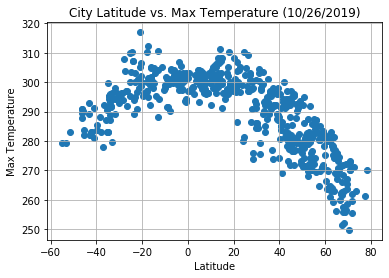

In [57]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max_Temperature"], marker="o")

d = datetime.datetime.today()

# Incorporate the other graph properties
title = 'City Latitude vs. Max Temperature ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureandLatitudes.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

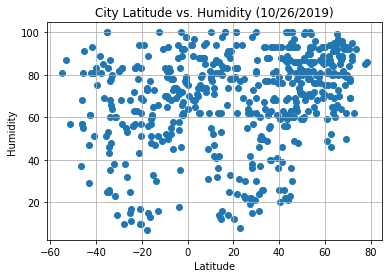

In [60]:
# Build a scatter plot for humidy and latitude
plt.scatter(weather_df["Lat"],weather_df["Humidity"],  marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Humidity ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityandLatitudes.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

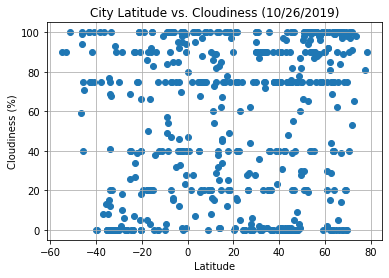

In [68]:
# Build a scatter plot for Cloudiness and latitude
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Cloudiness ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessandLatitudes.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

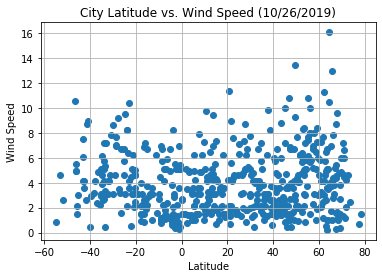

In [65]:
# Build a scatter plot for Wind Speed and latitude
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
title = 'City Latitude vs. Wind Speed ('+ str(d.month) +'/' + str(d.day)+'/' + str(d.year)+')'
plt.title(title)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedandLatitudes.png")

# Show plot
plt.show()